# Example-1

A cantilever beam 9 meters in length has a distributed constant load of 8 kN/m applied downward from the fixed end over a 5 meter distance. A counterclockwise moment of 50 kN-m is applied 5 meters from the fixed end. Lastly, a downward point load of 12 kN is applied at the free end of the beam.

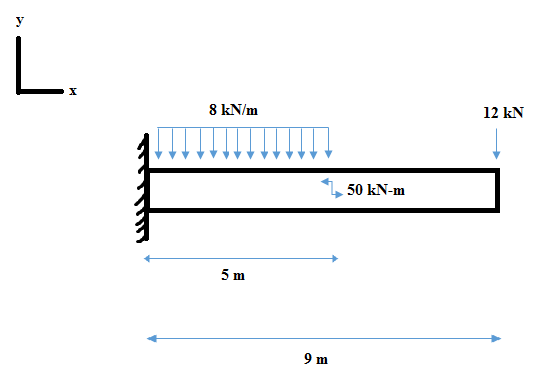

In [92]:
# Importing Necessary Libraries & Functions
from sympy import *
from sympy.physics.continuum_mechanics.beam import Beam

In [93]:
E,I = symbols('E,I') # Symbolizing unknown quntities

In [94]:
B1 = Beam(9,E,I) # Defining the Beam

In [95]:
# Sign Conventions
# Positive Signs => Towards Right(+x) & Upwards(+y)
# Negative Signs => Towards Left(-x) & Downwards(-y)

In [96]:
# Applying Loads & Moments acting on the Beam
B1.apply_load(-12,9,-1)
B1.apply_load(-50,5,-2)
B1.apply_load(-8,0,0,end=5)

In [97]:
# Applying Boundary Conditions
# Deflection @(x=0) = 0
# Slope @(x=0) = 0
B1.bc_deflection.append((0,0)) # (0,0) = (x=0,Deflection=0)
B1.bc_slope.append((0,0))

In [98]:
# Finding Load & Moment at the fixed end of the beam
R,M = symbols('R,M')
B1.apply_load(R,0,-1)
B1.apply_load(M,0,-2)

B1.solve_for_reaction_loads(R,M)
B1.reaction_loads

{R: 52, M: -158}

In [99]:
# Intensity Load Function
B1.load

-158*SingularityFunction(x, 0, -2) + 52*SingularityFunction(x, 0, -1) - 8*SingularityFunction(x, 0, 0) - 50*SingularityFunction(x, 5, -2) + 8*SingularityFunction(x, 5, 0) - 12*SingularityFunction(x, 9, -1)

In [100]:
# Shear Force Function in terms of x
B1.shear_force()

-158*SingularityFunction(x, 0, -1) + 52*SingularityFunction(x, 0, 0) - 8*SingularityFunction(x, 0, 1) - 50*SingularityFunction(x, 5, -1) + 8*SingularityFunction(x, 5, 1) - 12*SingularityFunction(x, 9, 0)

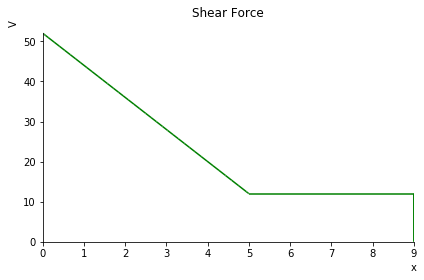

In [104]:
# Plot of Shear Force Variation VS x
B1.plot_shear_force()

In [103]:
# Bending Moment Function in terms of x
B1.bending_moment()

-158*SingularityFunction(x, 0, 0) + 52*SingularityFunction(x, 0, 1) - 4*SingularityFunction(x, 0, 2) - 50*SingularityFunction(x, 5, 0) + 4*SingularityFunction(x, 5, 2) - 12*SingularityFunction(x, 9, 1)

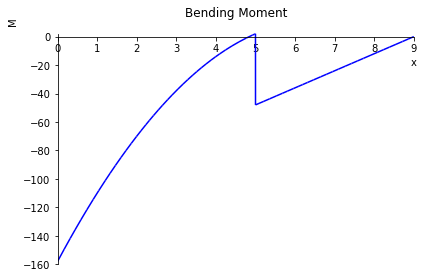

In [105]:
# Plot of Bending Moment Variation VS x
B1.plot_bending_moment()

In [107]:
# Slope
B1.slope()

(-158*SingularityFunction(x, 0, 1) + 26*SingularityFunction(x, 0, 2) - 4*SingularityFunction(x, 0, 3)/3 - 50*SingularityFunction(x, 5, 1) + 4*SingularityFunction(x, 5, 3)/3 - 6*SingularityFunction(x, 9, 2))/(E*I)

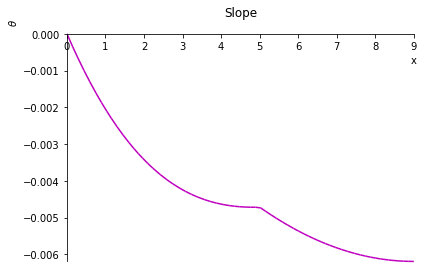

In [108]:
# Plot of Slope Variation VS X
# Assuming E = 20E9 & I = 3.25E-6
B1.plot_slope(subs={E: 20E9, I:3.25E-6})

In [111]:
# Deflection
B1.deflection()

(-79*SingularityFunction(x, 0, 2) + 26*SingularityFunction(x, 0, 3)/3 - SingularityFunction(x, 0, 4)/3 - 25*SingularityFunction(x, 5, 2) + SingularityFunction(x, 5, 4)/3 - 2*SingularityFunction(x, 9, 3))/(E*I)

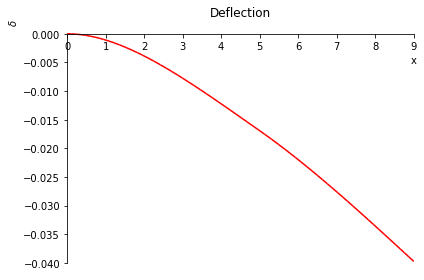

In [112]:
# Plot of Deflection Variation VS x
B1.plot_deflection(subs={E: 20E9,I: 3.25E-6})

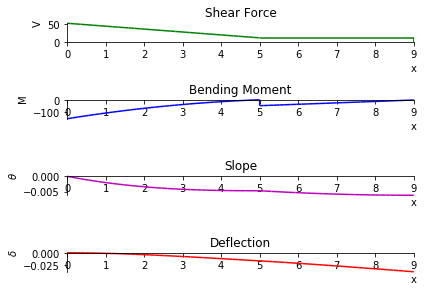

In [114]:
# All Plots considering E=20E9 & I=3.25E-6
B1.plot_loading_results(subs={E: 20E9,I: 3.25E-6})